In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

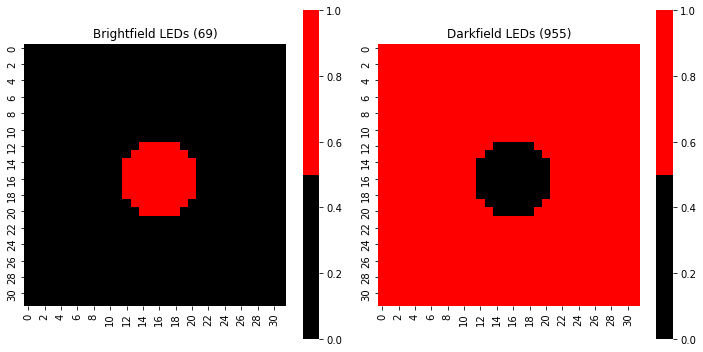

In [48]:
x = np.arange(0, 32)
y = np.arange(0, 32)
arr = np.zeros((y.size, x.size))

cx = 16
cy = 16
r = 5

mask = (x[np.newaxis,:]-cx)**2 + (y[:,np.newaxis]-cy)**2 < r**2
arr[mask] = 1

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
sns.heatmap(arr, cmap=['black', 'r'], ax=axs[0])
axs[0].set_aspect('equal')
axs[0].set_title(f'Brightfield LEDs ({np.count_nonzero(arr)})')

arr = np.zeros((y.size, x.size))
arr[~mask] = 1
sns.heatmap(arr, cmap=['black', 'r'], ax=axs[1])
axs[1].set_aspect('equal')
axs[1].set_title(f'Darkfield LEDs ({np.count_nonzero(arr)})')

plt.tight_layout()
plt.show()